
# Introduction

In this notebook,I analyzed and visualized data from the demographic information and what financial services are used by approximately 10,000 individuals across Tanzania.This data was extracted from the FSDT Finscope 2017 survey and prepared specifically for this challenge.Each individual was classified as mobile money only,mobile money with other services,non mobile money and non mobile money and other services.This was done to represent the relationship between financial services accessed and how often the mobile money services are used(non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("bmh")

%matplotlib inline


In [2]:
df = pd.read_csv("training.csv")

In [3]:
df.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3



Renaming columns of age,gender,maritual status,land ownership and income types


In [4]:
df.rename(columns = {
    "Q1": "Age",
    "Q2": "Gender",
    "Q3": "Maritual Status",
    "Q5": "Land Ownership", 
    "Q6": "Other land ownership", 
    "Q7": "Mobile Or Non mobile", 
    "Q8_1": "Salaries/Wages",
    "Q8_2": "Food Producer",
    "Q8_3": "Service Provider", 
    "Q8_4": "Parttime Occupation", 
    "Q8_5": "Rental Income", 
    "Q8_6":  "Investments", 
    "Q8_7": "Pension",
    "Q8_8": "Grant",
    "Q8_9": "Dependent On Others", 
    "Q8_10": "No Income",
    "Q8_11": "Other",
    "Q16": "Mobile Money Purchase", 
    "Q17": "Mobile Money Bills"
}, inplace = True)

# Below I checked the data type and my colums to check if there's nothing I'm not expecting.


In [5]:
#Checking columns
df.columns

#Checking data types
df.dtypes

ID                               int64
Age                              int64
Gender                           int64
Maritual Status                  int64
Q4                               int64
Land Ownership                   int64
Other land ownership             int64
Mobile Or Non mobile             int64
Salaries/Wages                   int64
Food Producer                    int64
Service Provider                 int64
Parttime Occupation              int64
Rental Income                    int64
Investments                      int64
Pension                          int64
Grant                            int64
Dependent On Others              int64
No Income                        int64
Other                            int64
Q9                               int64
Q10                              int64
Q11                              int64
Q12                              int64
Q13                              int64
Q14                              int64
Q15                      

Now that I know the data types and which columns I wanna work with,I am gonna get rid of the columns that I do not need by droping all unneeded columns to make it easier to work with the needed dataframe.

In [6]:
df.drop(["Q4",
         "Q9",
         "Q10",
         "Q11",
         "Q12", 
         "Q13", 
         "Q14", 
         "Q15", 
         "Q18",
         "Q19",
         "Latitude",
         "Longitude"], axis = 1 , inplace = True)
df


,ID,Age,Gender,Maritual Status,Land Ownership,Other land ownership,Mobile Or Non mobile,Salaries/Wages,Food Producer,Service Provider,...,Dependent On Others,No Income,Other,Mobile Money Purchase,Mobile Money Bills,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,2,2,0,0,0,...,1,0,0,1,-1,0,0,0,0,0
1,1258,40,1,1,5,1,1,1,0,0,...,0,0,0,4,4,1,1,1,0,3
2,331,18,2,4,3,2,1,0,0,0,...,1,0,0,1,-1,1,0,0,0,2
3,6729,50,1,1,1,1,1,0,0,0,...,0,0,0,4,-1,1,0,1,0,3
4,8671,34,1,1,1,2,1,0,1,0,...,0,0,0,1,-1,1,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,8378,57,2,3,1,2,2,0,1,0,...,1,0,0,1,-1,0,1,0,0,1
7090,881,32,1,1,3,1,1,0,1,0,...,0,0,0,5,-1,1,1,0,0,3
7091,6672,22,2,3,3,2,2,0,1,0,...,0,0,0,1,-1,0,0,0,0,0
7092,5416,28,2,1,1,2,2,0,1,0,...,0,0,0,1,-1,1,0,0,1,3




# Missing Data



# 1.Examine the dataset. Are there any missing observations or columns where the data do not seem valid?

In [7]:
#Finding missing observations

df.isnull().sum()

ID                             0
Age                            0
Gender                         0
Maritual Status                0
Land Ownership                 0
Other land ownership           0
Mobile Or Non mobile           0
Salaries/Wages                 0
Food Producer                  0
Service Provider               0
Parttime Occupation            0
Rental Income                  0
Investments                    0
Pension                        0
Grant                          0
Dependent On Others            0
No Income                      0
Other                          0
Mobile Money Purchase          0
Mobile Money Bills             0
mobile_money                   0
savings                        0
borrowing                      0
insurance                      0
mobile_money_classification    0
dtype: int64

There are no missing values in this dataFrame

# 2.Get basic descriptive statistics for the dataset.



Finding the basic descriptive statistics of the dataset.

In [8]:
df.describe()


,ID,Age,Gender,Maritual Status,Land Ownership,Other land ownership,Mobile Or Non mobile,Salaries/Wages,Food Producer,Service Provider,...,Dependent On Others,No Income,Other,Mobile Money Purchase,Mobile Money Bills,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,2.548915,1.840569,1.397942,0.062165,0.630110,0.058077,...,0.156752,0.057795,0.001269,1.951508,-0.431914,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.534257,0.366103,0.489508,0.241472,0.482809,0.233906,...,0.363593,0.233372,0.035598,1.580819,1.489879,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000


7094 interviews were made in total.

Finding total number of people who were interviewed(male and female)

In [9]:
#Total of male and female

Male = df[df["Gender"] == 1]
Female = df[df["Gender"] == 2]

Male.describe()
Female.describe()



,ID,Age,Gender,Maritual Status,Land Ownership,Other land ownership,Mobile Or Non mobile,Salaries/Wages,Food Producer,Service Provider,...,Dependent On Others,No Income,Other,Mobile Money Purchase,Mobile Money Bills,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,3972.000000,3972.000000,3972.0,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,...,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,4758.365811,37.479607,2.0,1.799345,2.687059,1.877392,1.478097,0.044058,0.594914,0.054632,...,0.228852,0.084089,0.001259,1.821752,-0.496224,0.496224,0.424723,0.401309,0.153072,1.648036
std,2725.863440,16.084996,0.0,1.103220,1.485938,0.328028,0.499583,0.205251,0.490970,0.227290,...,0.420147,0.277556,0.035462,1.515122,1.392767,0.500049,0.494363,0.490225,0.360102,1.206876
min,2.000000,16.000000,2.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2411.500000,25.000000,2.0,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4774.000000,34.000000,2.0,1.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7107.500000,46.000000,2.0,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,3.000000
max,9457.000000,100.000000,2.0,4.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000


Out of the 7094 interviews,there total number of males who were interviewed is 3122 and the total of females is 3972.

# 3.Create appropriate graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

Classifying the rows in the dataframe for non mobile money users,mobile money users,non mobile or other and both mobile money and other in a new column

In [10]:


classification = []
for i in df["mobile_money_classification"]:
    if i == 0 or i ==1 :
        classification.append("Non_mobile_money")
        
    else:
        classification.append("Mobile_money")
        
        
        
df["classification"] = classification

In [11]:
Non_mobile_money_or_other = df[(df.mobile_money_classification == 0)]
Non_mobile_money = df[(df.mobile_money_classification == 1)]
Mobile_money_only = df[(df.mobile_money_classification == 2)]
Both = df[(df.mobile_money_classification == 3)]

Non_mobile_money_or_other
Non_mobile_money
Mobile_money_only 
Both


,ID,Age,Gender,Maritual Status,Land Ownership,Other land ownership,Mobile Or Non mobile,Salaries/Wages,Food Producer,Service Provider,...,No Income,Other,Mobile Money Purchase,Mobile Money Bills,mobile_money,savings,borrowing,insurance,mobile_money_classification,classification
1,1258,40,1,1,5,1,1,1,0,0,...,0,0,4,4,1,1,1,0,3,Mobile_money
3,6729,50,1,1,1,1,1,0,0,0,...,0,0,4,-1,1,0,1,0,3,Mobile_money
4,8671,34,1,1,1,2,1,0,1,0,...,0,0,1,-1,1,1,0,1,3,Mobile_money
6,4886,31,2,1,1,2,1,0,1,0,...,0,0,1,-1,1,1,1,1,3,Mobile_money
7,621,23,2,4,5,2,1,0,0,1,...,0,0,5,1,1,1,0,0,3,Mobile_money
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7085,4860,36,2,2,5,2,1,0,1,0,...,0,0,1,1,1,1,1,0,3,Mobile_money
7086,24,24,1,1,4,2,1,0,1,0,...,0,0,2,-1,1,1,0,0,3,Mobile_money
7087,5546,25,1,1,1,2,1,0,1,0,...,0,0,1,-1,1,1,1,0,3,Mobile_money
7090,881,32,1,1,3,1,1,0,1,0,...,0,0,5,-1,1,1,0,0,3,Mobile_money


Maping for mobile money classification

In [12]:
mobile_money_classification = {0 : "Non mobile money or other", 1 : "Non mobile money", 2 : "Mobile money only", 3 : "Both"}
df["mobile_money_classification"] = df["mobile_money_classification"].map(mobile_money_classification)



Visualising data for (non mobile money,mobile money and both) and Age

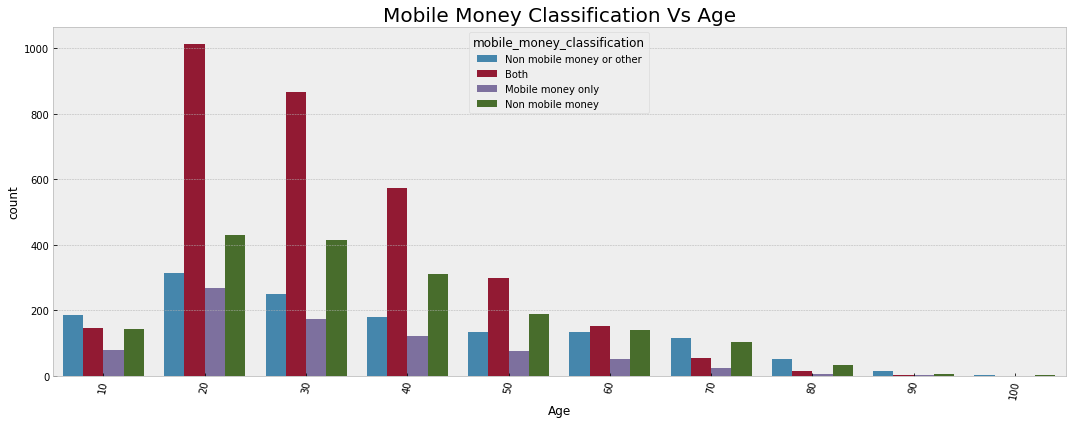

In [13]:
plt.figure(figsize = (15, 6))
df['Age'] = df.Age.apply(lambda x : int(x/10) * 10)

plt.title("Mobile Money Classification Vs Age", fontsize = 20)
plt.xticks( rotation = 80)
sns.countplot(x = "Age", hue = "mobile_money_classification", data = df)
plt.tight_layout()
plt.show()

From the graph it is clear that people who are at their 20's use both mobile money and other services than other ages.

Maping for gender

In [14]:
gender = { 1: "Male", 2: "Female"}
df["Gender"] = df["Gender"].map(gender)




Visualising data for (non mobile money,mobile money and both) and gender

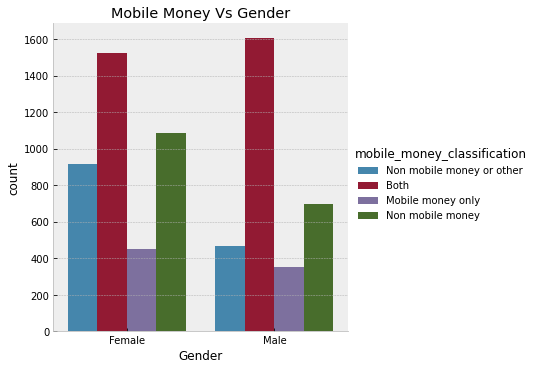

In [15]:
# Checking the gender of non mobile money,mobile money and both

_ = sns.catplot(x = "Gender", kind = "count", hue = "mobile_money_classification", data = df)
_ = plt.title("Mobile Money Vs Gender")

There are more males with both mobile money and other services while there are less woman who use mobile money.

# Maping for income types

In [22]:
#Salaries/Wages maping
Assign_sow = {1 : "Yes", 0 : "No"}
df["Salaries/Wages"] = df["Salaries/Wages"].map(Assign_sow) 

#Food Producer maping
Assign_fp = {1 : "Yes", 0 : "No"}
df["Food Producer"] = df["Food Producer"].map(Assign_sow)

#Service Provider maping
Assign_sp = {1 : "Yes", 0 : "No"}
df["Service Provider"] = df["Service Provider"].map(Assign_sp)

#Parttime Occupation
Assign_po = {1 : "Yes", 0 : "No"}
df["Parttime Occupation"] = df["Parttime Occupation"].map(Assign_po)

#Rental Income  
Assign_ri = {1 : "Yes", 0 : "No"}
df["Rental Income"] = df["Rental Income"].map(Assign_ri)

#Investments
Assign_i =  {1 : "Yes", 0 : "No"}
df["Investments"] = df["Investments"].map(Assign_i)

#Pension maping
Assign_p = {1 : "Yes", 0 : "No"}
df["Pension"] = df["Pension"].map(Assign_p)

#Grant  
Assign_g = {1 : "Yes", 0 : "No"}
df["Grant"] = df["Grant"].map(Assign_g)

#Dependent On Others 
Assign_doo = {1 : "Yes", 0 : "No"}
df["Dependent On Others"] = df["Dependent On Others"].map(Assign_doo)

#No Income   
Assign_no = {1 : "Yes", 0 : "No"}
df["No Income"] = df["No Income"].map(Assign_no)

#Other     
Assign_o = {1 : "Yes", 0 : "No"}
df["Other"] = df["Other"].map(Assign_o)




# Maping for Maritual Status

In [27]:
Married = df[df["Maritual Status"] == 1]
Divorced = df[df["Maritual Status"] == 2]
Widowed = df[df["Maritual Status"] == 3]
Single = df[df["Maritual Status"] == 4]


Maritual_Status = {1: "Married", 2: "Divorced", 3: "Widowed", 4:"Single"}
df["Maritual Status"] = df["Maritual Status"].map(Maritual_Status)

# Visualising data for (non mobile money,mobile money and both) and maritual status

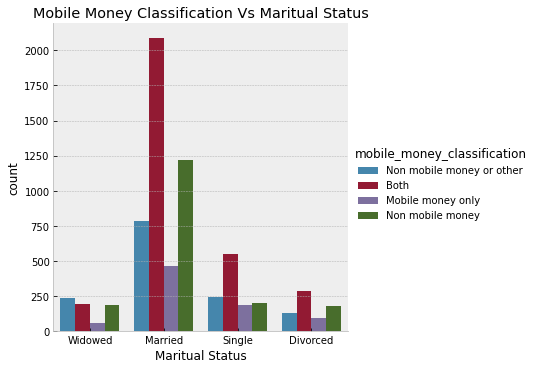

In [28]:
_ = sns.catplot(x = "Maritual Status", kind = "count", data = df, hue = "mobile_money_classification")
_ = plt.title("Mobile Money Classification Vs Maritual Status")

Looking at the graph it is clear that mobile money and other services are used by married people.This can be because more married people were interviewed.

# Mapping for Land Ownership 


In [29]:
Landowner = df[df["Land Ownership"] == 1]
Sharing_land = df[df["Land Ownership"] == 2]
Household_member_owns_land = df[df["Land Ownership"] == 3]
Renting = df[df["Land Ownership"] == 4]
Owns_no_land = df[df["Land Ownership"] == 5]
Unknown = df[df["Land Ownership"] == 6]

Landownership = {1 : "Landowner", 2 : "Sharing_land", 3 : "Household_member_owns_land", 4 : "Renting", 5 : "Owns_no_land", 6 : "Unknown" }

df["Land Ownership"] = df["Land Ownership"].map(Landownership)

Visualising data for (non mobile money,mobile money and both) and Land Ownership


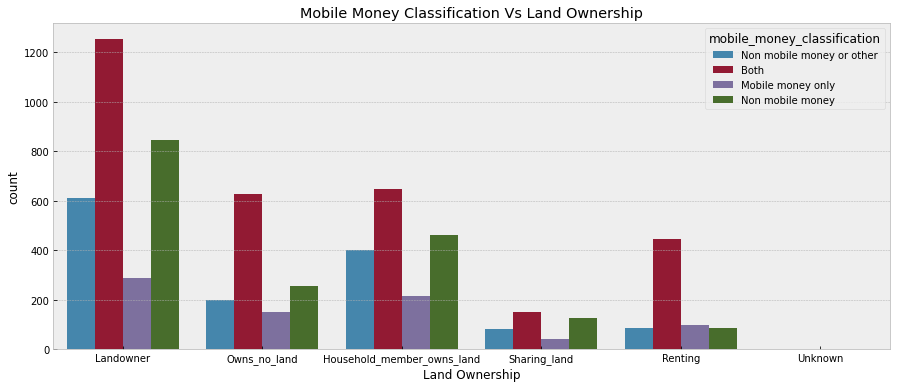

In [30]:
plt.figure(figsize = (15, 6))
sns.countplot(x = "Land Ownership", hue = "mobile_money_classification", data = df)
_ = plt.title("Mobile Money Classification Vs Land Ownership")

Looking at the graph it is clear that more people who own land use mobile money and other services

 # 4.Create appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income

# Maping for Mobile Money Purchase 

In [ ]:


mobile_money_purchase = { 
    -1 : "Not Applicable", 
    1 : "Never", 
    2 : "Daily", 
    3 : "Weekly", 
    4 : "Monthly", 
    5 : "Less Than Monthly"
}

df["Mobile Money Purchase"] = df["Mobile Money Purchase"].map(mobile_money_purchase)



# Maping for Mobile Money Bills


In [ ]:
mobile_money_bills = {
    -1 : "Not Applicable", 
    1 : "Never", 
    2 : "Daily", 
    3 : "Weekly", 
    4 : "Monthly", 
    5 : "Less Than Monthly"
}
df["Mobile Money Bills"] = df["Mobile Money Bills"].map(mobile_money_bills)

# Visualising mobile services used and Age